<a href="https://colab.research.google.com/github/krishnakaushik25/Number-Plate-Recognition-OCR-Web-App/blob/main/02_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/WhatsApp chat/labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1093,1396,645,727
1,./images\N100.xml,134,301,312,350
2,./images\N101.xml,31,139,128,161
3,./images\N102.xml,164,316,216,243
4,./images\N103.xml,813,1067,665,724


In [4]:

df['filepath'] = df['filepath'].apply(lambda x:x.replace("\\", "/"))
df['filepath'] = df['filepath'].apply(lambda x:x[1:])

In [5]:
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/images/N1.xml,1093,1396,645,727
1,/images/N100.xml,134,301,312,350
2,/images/N101.xml,31,139,128,161
3,/images/N102.xml,164,316,216,243
4,/images/N103.xml,813,1067,665,724


In [6]:
import xml.etree.ElementTree as xet

In [7]:
filename = df['filepath'][0]
filename

'/images/N1.xml'

In [8]:
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find("filename").text
    filepath_image = os.path.join('./images',filename_image)
   
    return filepath_image

In [9]:
getFilename("/content/drive/MyDrive/WhatsApp chat"+filename)

'./images/N1.jpeg'

In [10]:
image_path = list(df['filepath'].apply(lambda x:getFilename("/content/drive/MyDrive/WhatsApp chat"+x)))
image_path 

['./images/N1.jpeg',
 './images/N100.jpeg',
 './images/N101.jpeg',
 './images/N102.jpeg',
 './images/N103.jpeg',
 './images/N104.jpeg',
 './images/N105.jpeg',
 './images/N106.jpeg',
 './images/N107.jpeg',
 './images/N108.jpeg',
 './images/N109.jpeg',
 './images/N11.jpeg',
 './images/N110.jpeg',
 './images/N111.jpeg',
 './images/N112.jpeg',
 './images/N113.jpeg',
 './images/N114.jpeg',
 './images/N116.jpeg',
 './images/N117.jpeg',
 './images/N118.jpeg',
 './images/N119.jpeg',
 './images/N12.jpeg',
 './images/N120.jpeg',
 './images/N121.jpeg',
 './images/N122.jpeg',
 './images/N123.jpeg',
 './images/N124.jpeg',
 './images/N126.jpeg',
 './images/N127.jpeg',
 './images/N128.jpeg',
 './images/N129.jpeg',
 './images/N130.jpeg',
 './images/N131.jpeg',
 './images/N132.jpeg',
 './images/N133.jpeg',
 './images/N134.jpeg',
 './images/N135.jpeg',
 './images/N136.jpeg',
 './images/N137.jpeg',
 './images/N138.jpeg',
 './images/N139.jpeg',
 './images/N14.jpeg',
 './images/N140.jpeg',
 './images/N141.

#### verify image and output

In [11]:
file_path = image_path[0]
file_path 

'./images/N1.jpeg'

In [12]:
"/content/drive/MyDrive/WhatsApp chat"+file_path[1:]

'/content/drive/MyDrive/WhatsApp chat/images/N1.jpeg'

In [13]:
img = cv2.imread("/content/drive/MyDrive/WhatsApp chat"+file_path[1:])

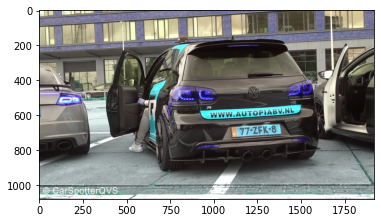

In [14]:
# Window name in which image is displayed
#Show the image with matplotlib
plt.imshow(img)
plt.show()

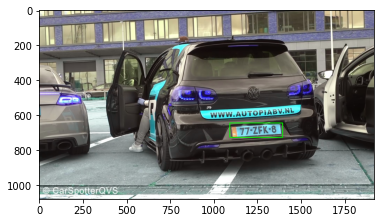

In [15]:
# 1093	1396	645	727
cv2.rectangle(img,(1093,645),(1396,727),(0,255,0),3)
plt.imshow(img)
plt.show()

### Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [17]:
labels = df.iloc[:,1:].values

In [21]:

image_path = ["/content/drive/MyDrive/WhatsApp chat"+x[1:] for x in image_path]

In [23]:
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # normalization
    # normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # normalized output
    # -------------- append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [28]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [29]:
X.shape,y.shape

((225, 224, 224, 3), (225, 4))

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

### Deep Learning Model

In [31]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [32]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable=False
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)
# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

219062272/219055592 [==============================] - 5s 0us/step


In [33]:
# complie model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### model training

In [34]:
from tensorflow.keras.callbacks import TensorBoard

In [35]:
tfb = TensorBoard('object_detection')

In [36]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/100
18/18 [==============================] - 49s 562ms/step - loss: 0.1383 - val_loss: 0.1484
Epoch 2/100
18/18 [==============================] - 4s 228ms/step - loss: 0.1398 - val_loss: 0.1515
Epoch 3/100
18/18 [==============================] - 4s 229ms/step - loss: 0.1411 - val_loss: 0.1518
Epoch 4/100
18/18 [==============================] - 4s 229ms/step - loss: 0.1356 - val_loss: 0.1346
Epoch 5/100
18/18 [==============================] - 4s 229ms/step - loss: 0.1084 - val_loss: 0.1191
Epoch 6/100
18/18 [==============================] - 4s 230ms/step - loss: 0.0992 - val_loss: 0.0996
Epoch 7/100
18/18 [==============================] - 4s 230ms/step - loss: 0.0857 - val_loss: 0.0929
Epoch 8/100
18/18 [==============================] - 4s 229ms/step - loss: 0.0794 - val_loss: 0.0962
Epoch 9/100
18/18 [==============================] - 4s 231ms/step - loss: 0.0800 - val_loss: 0.0915
Epoch 10/100
18/18 [==============================] - 4s 230ms/step - loss: 0.0767 - val_l

In [37]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=200,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=101)

Epoch 102/200
18/18 [==============================] - 5s 296ms/step - loss: 6.5834e-04 - val_loss: 0.0062
Epoch 103/200
18/18 [==============================] - 4s 229ms/step - loss: 4.5446e-04 - val_loss: 0.0065
Epoch 104/200
18/18 [==============================] - 5s 256ms/step - loss: 4.9178e-04 - val_loss: 0.0067
Epoch 105/200
18/18 [==============================] - 4s 228ms/step - loss: 6.4277e-04 - val_loss: 0.0060
Epoch 106/200
18/18 [==============================] - 4s 228ms/step - loss: 4.9071e-04 - val_loss: 0.0065
Epoch 107/200
18/18 [==============================] - 4s 229ms/step - loss: 5.0018e-04 - val_loss: 0.0060
Epoch 108/200
18/18 [==============================] - 4s 229ms/step - loss: 4.9060e-04 - val_loss: 0.0064
Epoch 109/200
18/18 [==============================] - 4s 228ms/step - loss: 4.1514e-04 - val_loss: 0.0062
Epoch 110/200
18/18 [==============================] - 4s 228ms/step - loss: 4.7150e-04 - val_loss: 0.0062
Epoch 111/200
18/18 [================

In [39]:
model.save('/content/drive/MyDrive/WhatsApp chat/object_detection.h5')